In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregar a rede de Zachary
G = nx.karate_club_graph()

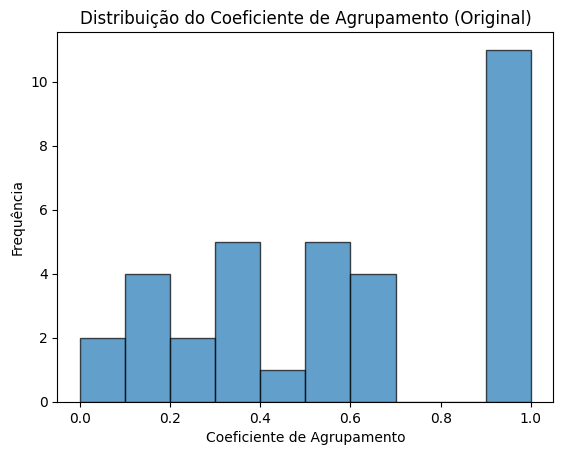

Média do coeficiente de agrupamento (Original): 0.5706



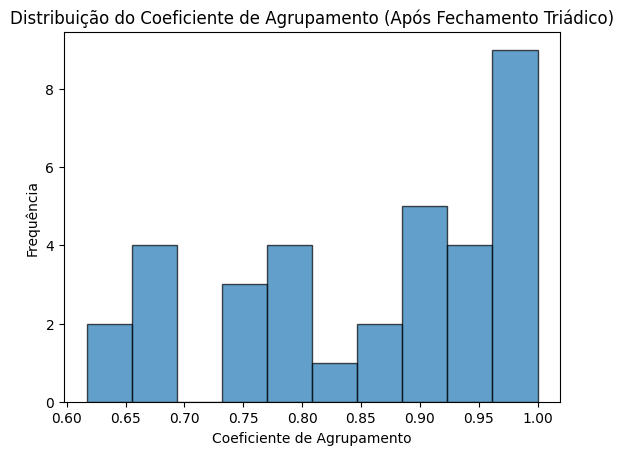

Média do coeficiente de agrupamento (Após Fechamento Triádico): 0.8606



In [4]:
# Função para calcular e imprimir estatísticas do coeficiente de agrupamento
def analyze_clustering(graph, title="Rede Original"):
    clustering_coeffs = list(nx.clustering(graph).values())
    avg_clustering = np.mean(clustering_coeffs)
    
    plt.hist(clustering_coeffs, bins=10, alpha=0.7, edgecolor='black')
    plt.xlabel("Coeficiente de Agrupamento")
    plt.ylabel("Frequência")
    plt.title(f"Distribuição do Coeficiente de Agrupamento ({title})")
    plt.show()
    
    print(f"Média do coeficiente de agrupamento ({title}): {avg_clustering:.4f}\n")
    return avg_clustering

# Analisar a rede original
original_clustering = analyze_clustering(G, "Original")

# Criar cópia da rede para simulação do fechamento triádico
G_triadic = G.copy()

# Aplicar fechamento triádico (conectar pares com vizinho em comum)
for node in G.nodes:
    neighbors = set(G.neighbors(node))
    for n1 in neighbors:
        for n2 in neighbors:
            if n1 != n2 and not G_triadic.has_edge(n1, n2):
                G_triadic.add_edge(n1, n2)  # Criar aresta fictícia

# Analisar a rede após fechamento triádico
triadic_clustering = analyze_clustering(G_triadic, "Após Fechamento Triádico")

Impacto percentual no coeficiente de agrupamento: 50.82%


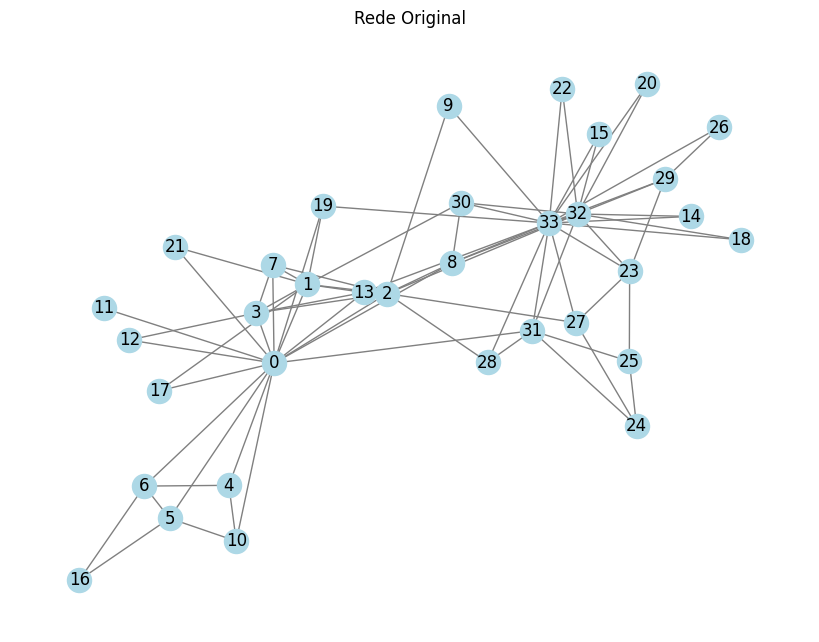

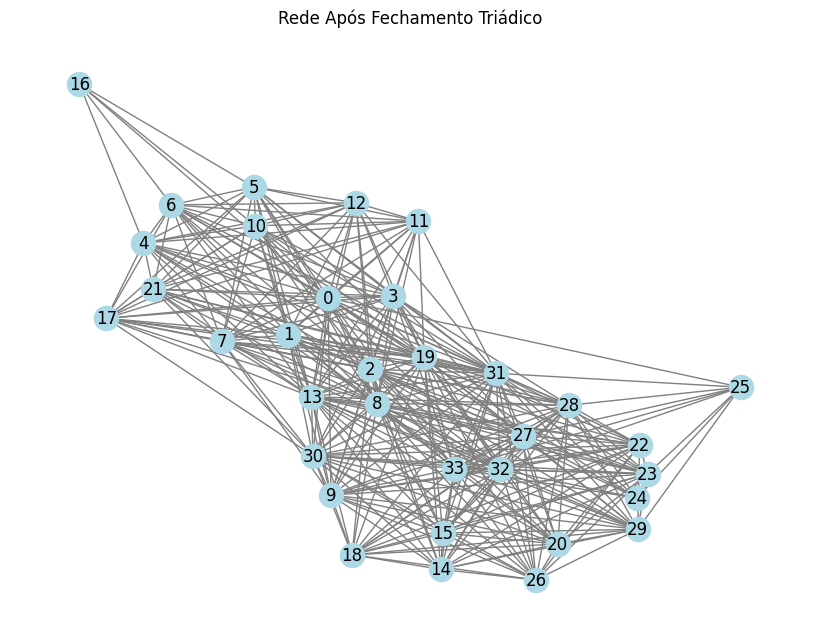

In [5]:
# Comparação do impacto
impact = (triadic_clustering - original_clustering) / original_clustering * 100
print(f"Impacto percentual no coeficiente de agrupamento: {impact:.2f}%")

# Visualização das redes antes e depois
def plot_graph(graph, title):
    plt.figure(figsize=(8, 6))
    nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()

plot_graph(G, "Rede Original")
plot_graph(G_triadic, "Rede Após Fechamento Triádico")